- Step 1: Reading and Understanding the Data
- Step 2: Visualising the Data
- Step 3: Data Preparation
- Step 4: Splitting the Data into Training and Testing Sets
- Step 5: Building a linear model
- Step 6: Residual Analysis of the train data
- Step 7: Making Predictions Using the Models
- Step 8: Model Evaluation
- Step 9: Model Selection and Conclusion 

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#reading the dataset 
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

We see all columns are non-null. Hence, we have no missing values.

In [5]:
# identifying rows and columns having all missing values
print("Rows with all missing values : ", car.isnull().all(axis=1).sum())
print("Columns with missing values : ", car.isnull().all(axis=0).sum())

Rows with all missing values :  0
Columns with missing values :  0


In [6]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#Creating a new column with Car company name as we need to consider only company name as the independent variable for model building.
car['carCompany'] = car['CarName'].apply(lambda x : x.split(" ")[0])
car.carCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
# There are some misspelled company names. Correcting them.
car['carCompany'] = car.carCompany.replace({ 'maxda': 'mazda', 
                                      'Nissan' : 'nissan', 
                                      'porcshce':'porsche',
                                      'toyouta': 'toyota',
                                      'vokswagen': 'volkswagen', 
                                      'vw': 'volkswagen' })
car.carCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Step 2: Visualising the Data

#### Visualizing the numeric variables

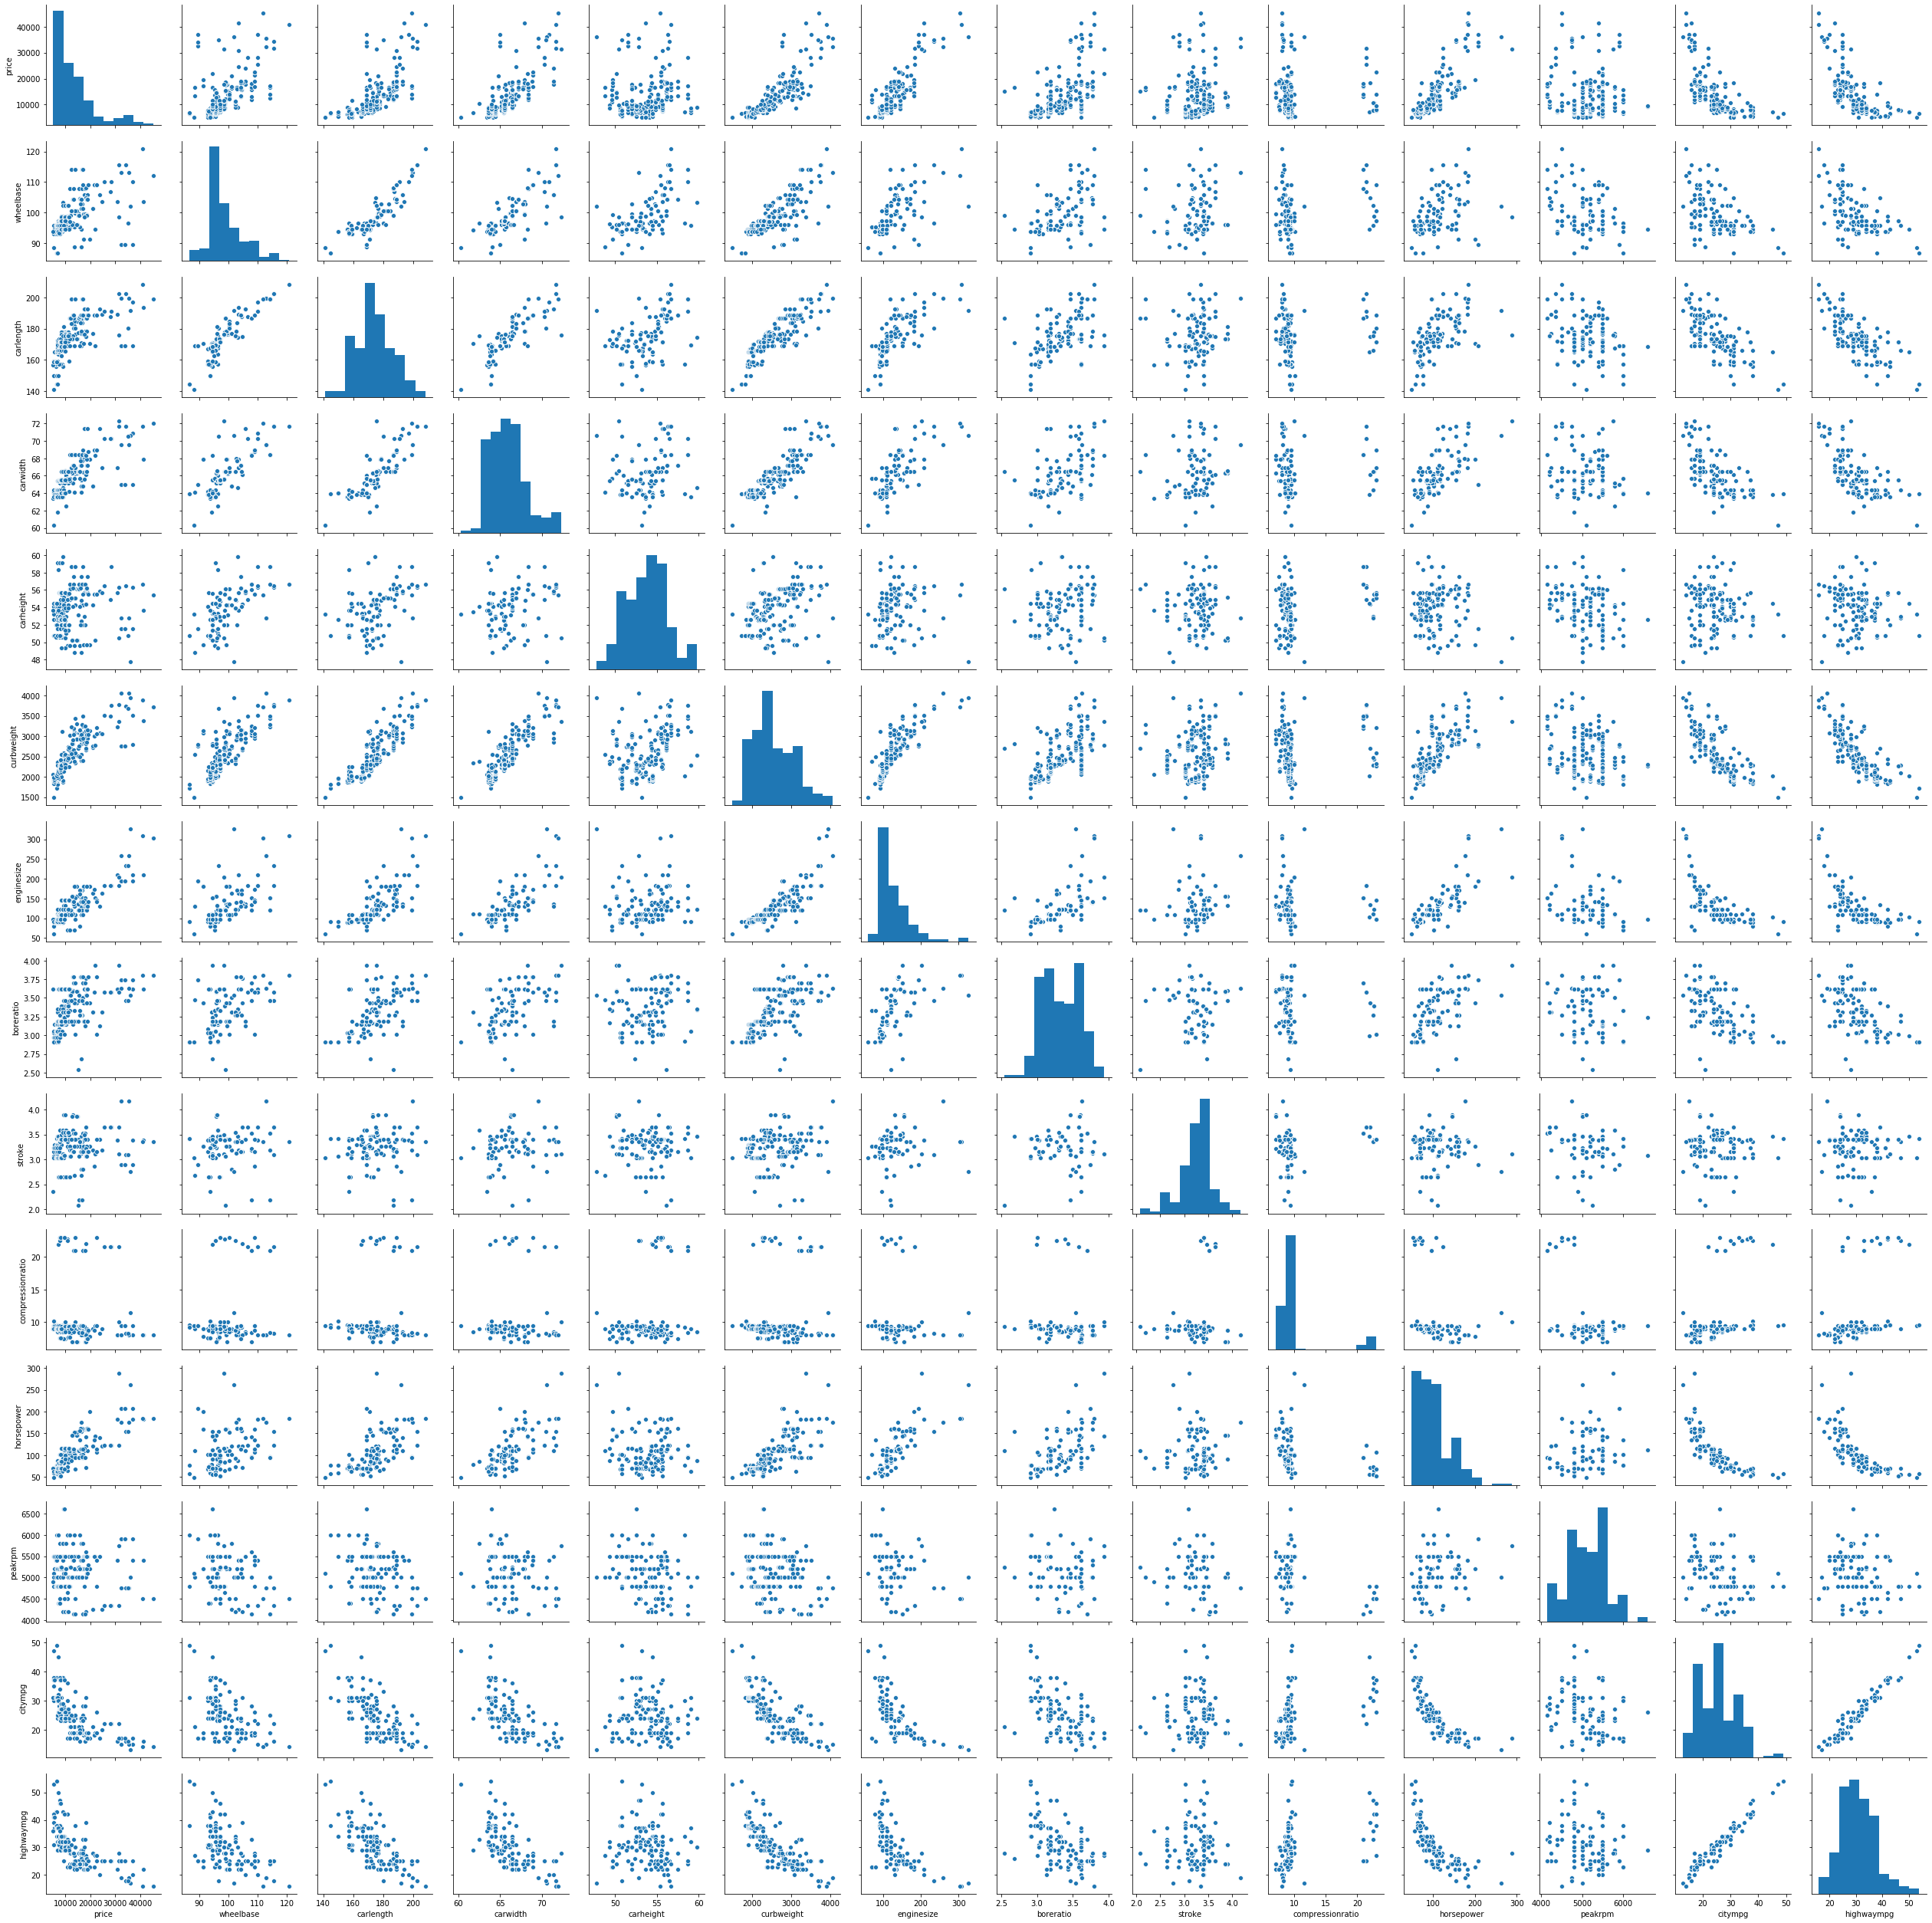

In [9]:

num_vars = ['price',
'wheelbase',
'carlength',
'carwidth',
'carheight',
'curbweight',
'enginesize',
'boreratio',
'stroke',
'compressionratio',
'horsepower',
'peakrpm',
'citympg',
'highwaympg']
sns.pairplot(car[num_vars])

plt.show()

We see there are correlations of price with variables like 'wheelbase',
'carlength',
'carwidth',
'carheight',
'enginesize','horsepower','citympg' and 'highwaympg'.

#### Visualizing the Categorical variables

In [10]:
# Let us see if categorical variables have any impact on the price
# First let us see how many unique values does each categorical variable has
cate_vars = ['symboling',
'carCompany',
'fueltype',
'aspiration',
'doornumber',
'carbody',
'drivewheel',
'enginelocation',
'enginetype',
'cylindernumber',
'fuelsystem']
car[cate_vars].nunique()

symboling          6
carCompany        22
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64

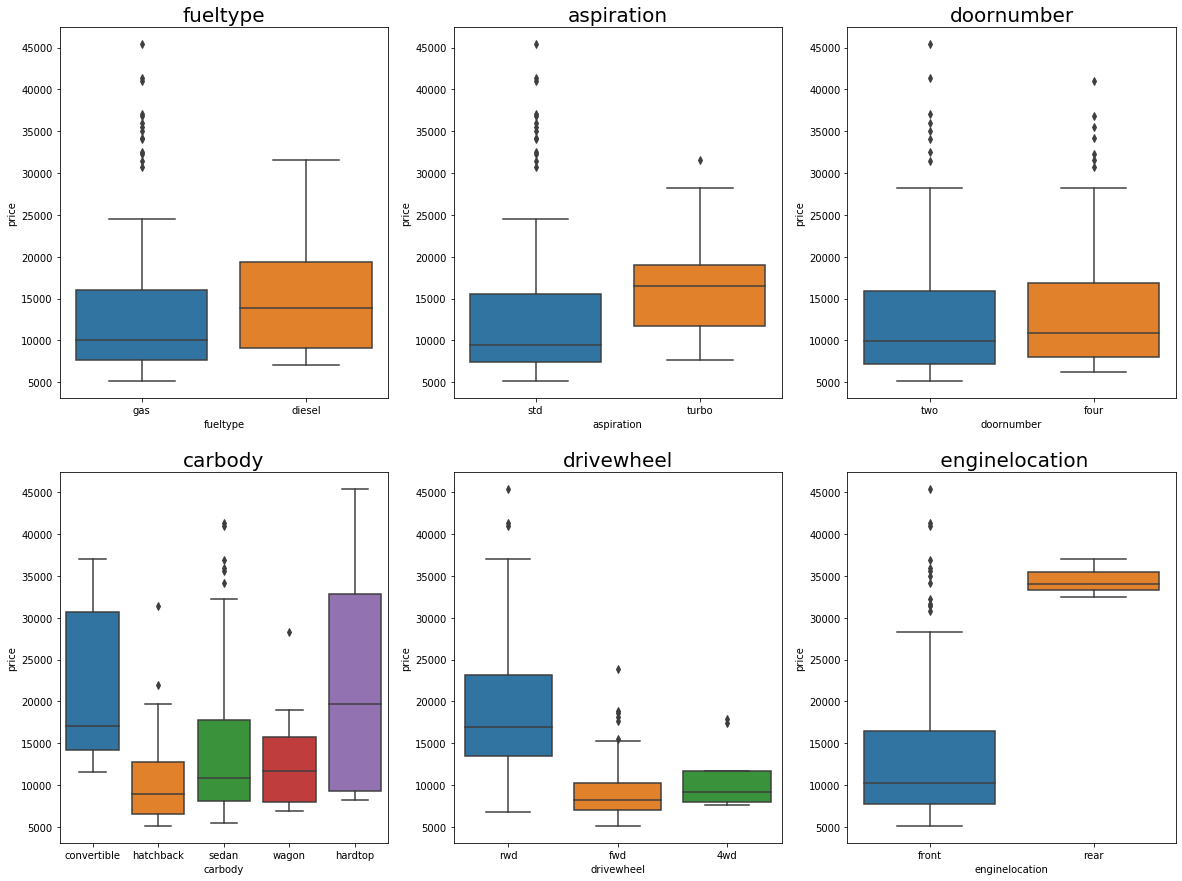

In [11]:
# Let us plot boxplots for categorical variables which have less than 5 unique values for ease of understanding the boxplots

plt.figure(figsize=(20, 15))

# subplot 1: 
plt.subplot(2, 3, 1)
sns.boxplot(x='fueltype', y='price',data=car)
plt.title("fueltype",fontsize=20)


# subplot 2: 
plt.subplot(2, 3, 2)
sns.boxplot(x='aspiration', y='price',data=car)
plt.title("aspiration",fontsize=20)


# subplot 3: 
plt.subplot(2, 3, 3)
sns.boxplot(x='doornumber', y='price',data=car)
plt.title("doornumber",fontsize=20)


# subplot 4: 
plt.subplot(2, 3, 4)
sns.boxplot(x='carbody', y='price',data=car)
plt.title("carbody",fontsize=20)


# subplot 5 : 
plt.subplot(2, 3, 5)
sns.boxplot(x='drivewheel', y='price',data=car)
plt.title("drivewheel",fontsize=20)


# subplot 6: 
plt.subplot(2, 3, 6)
sns.boxplot(x='enginelocation', y='price',data=car)
plt.title(" enginelocation",fontsize=20)



plt.show()

We find that-
- price has small variations across fueltype, aspiration 
- significant variations across carbody, drivewheel and enginelocation 
- neglible variation across doornumber.

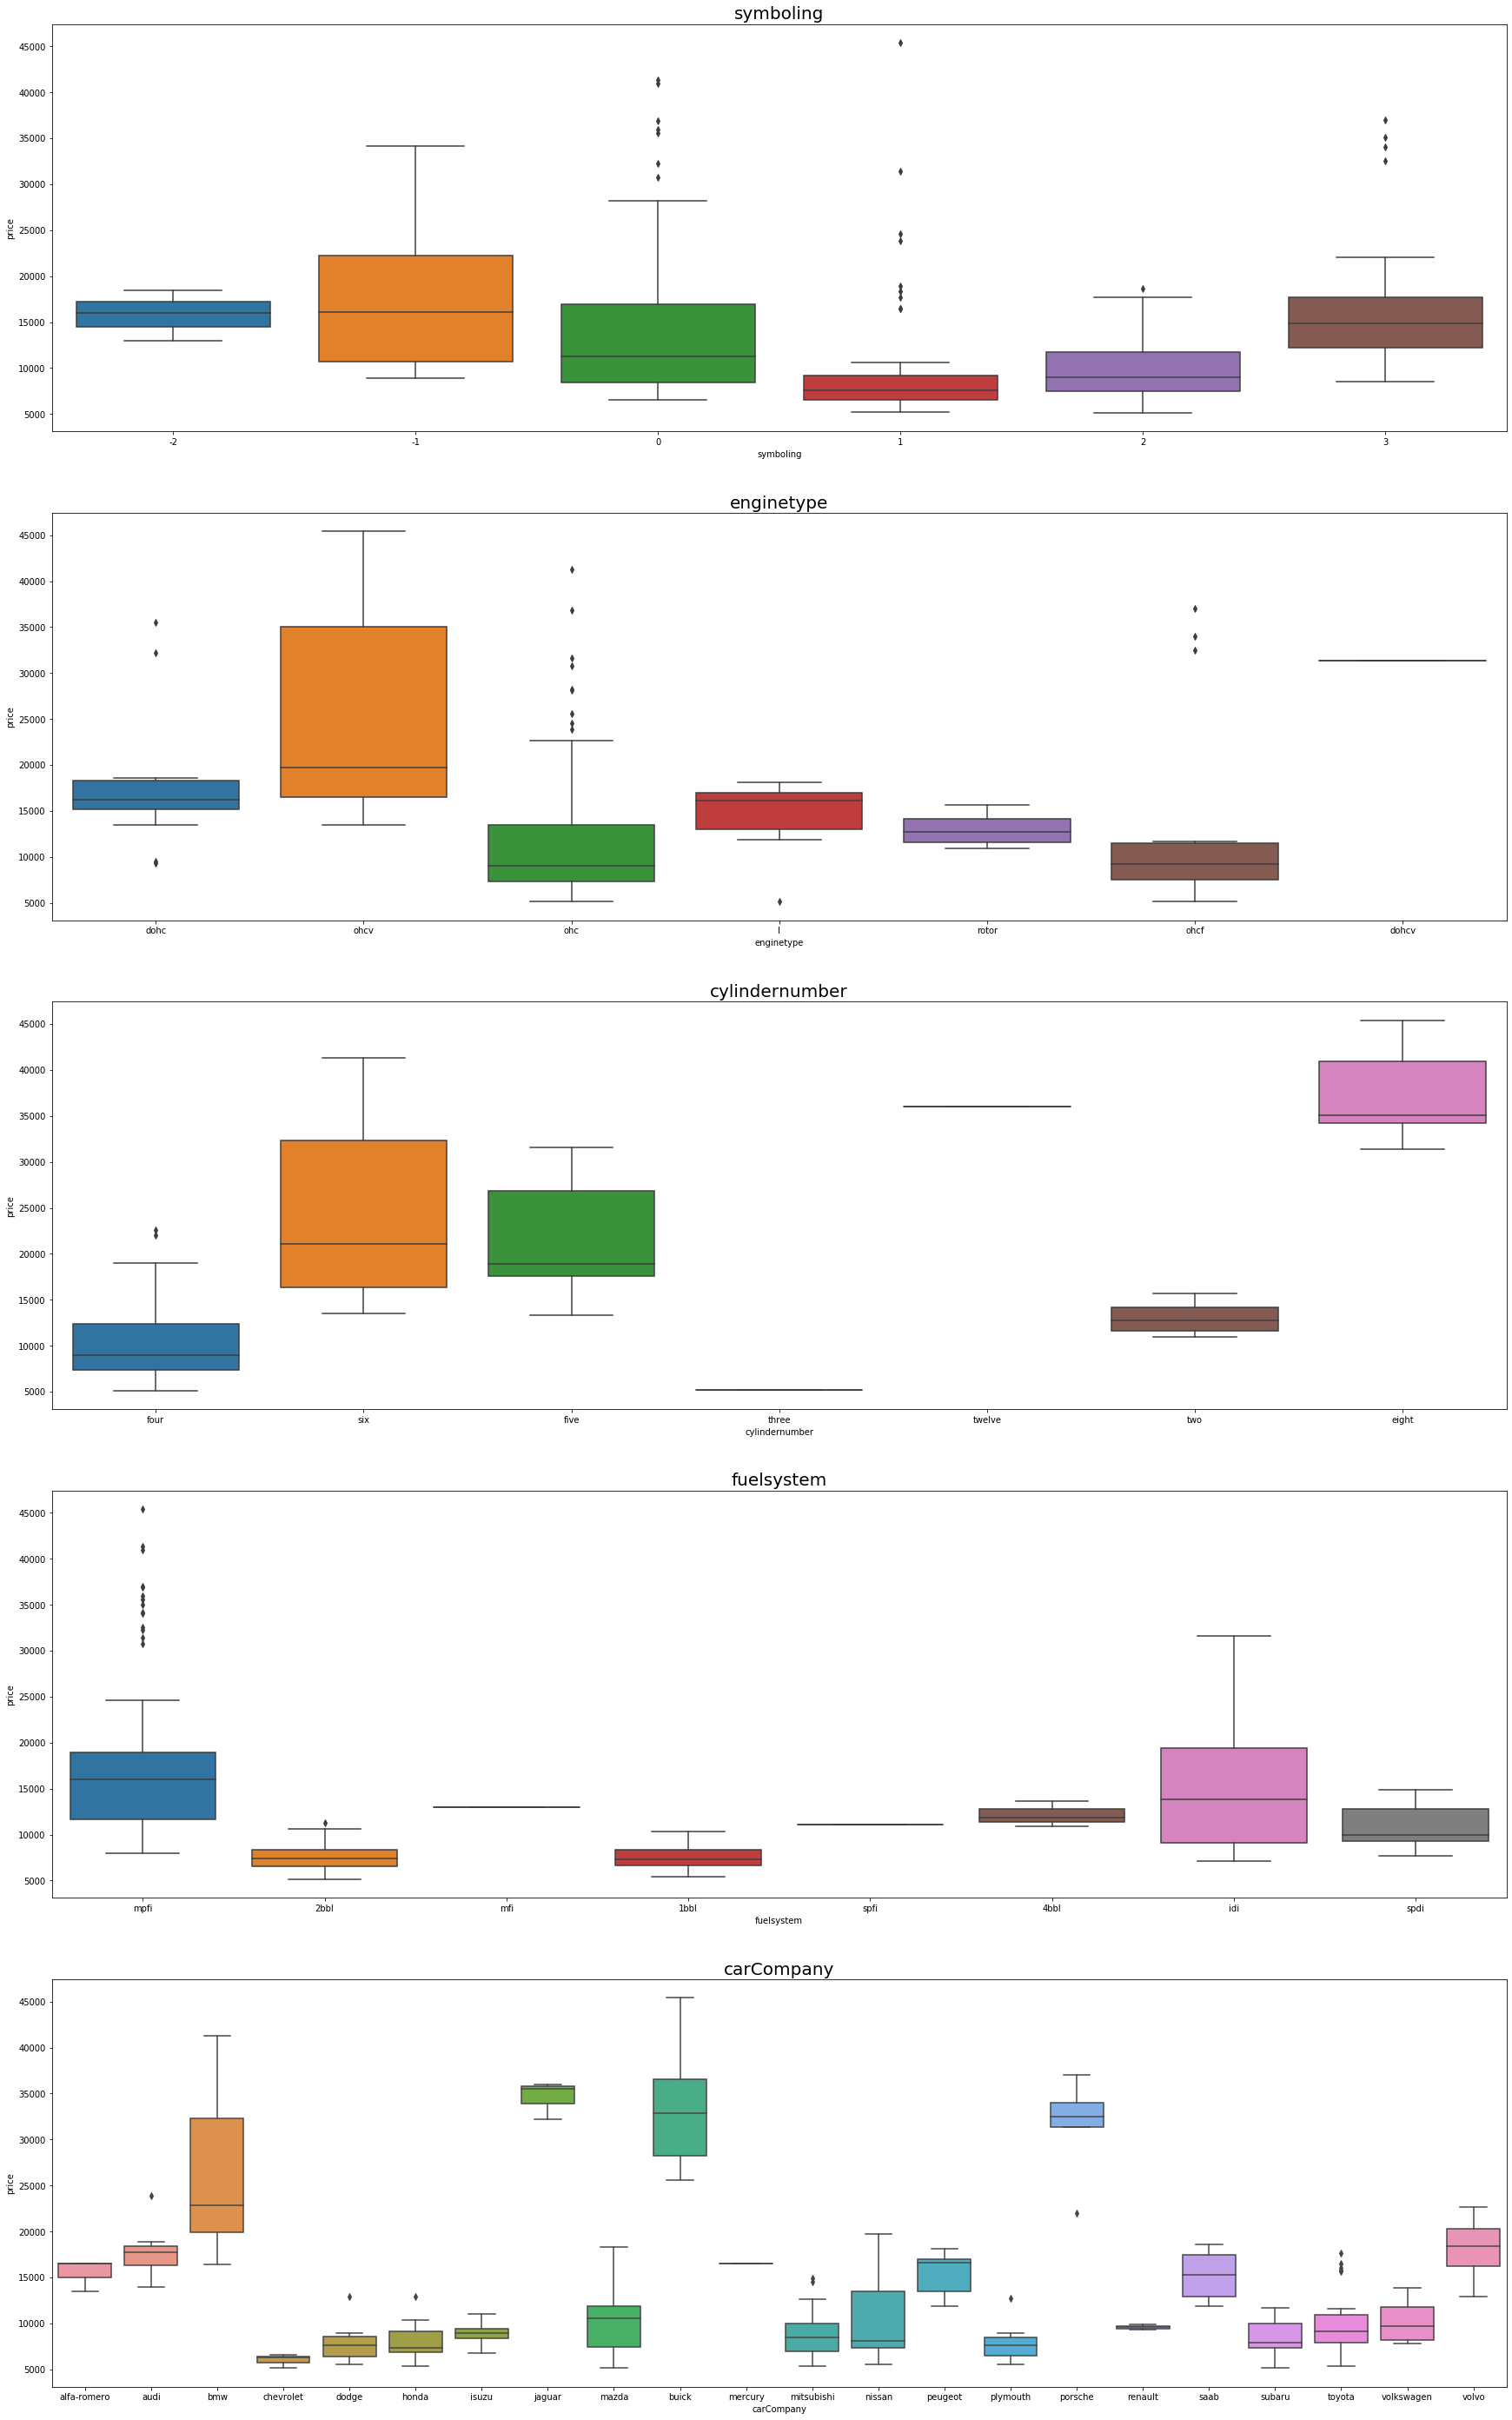

In [12]:
# Let us plot boxplots for categorical variables which have more than 5 unique values 

plt.figure(figsize=(30,50))

# subplot 1: 
plt.subplot(5, 1, 1)
sns.boxplot(x='symboling', y='price',data=car)
plt.title("symboling",fontsize=20)


# subplot 1: 
plt.subplot(5, 1, 2)
sns.boxplot(x='enginetype', y='price',data=car)
plt.title("enginetype",fontsize=20)



# subplot 3: 
plt.subplot(5, 1, 3)
sns.boxplot(x='cylindernumber', y='price',data=car)
plt.title("cylindernumber",fontsize=20)


# subplot 4: 
plt.subplot(5, 1, 4)
sns.boxplot(x='fuelsystem', y='price',data=car)
plt.title("fuelsystem",fontsize=20)


# subplot 5: 
plt.subplot(5, 1, 5)
sns.boxplot(x='carCompany', y='price',data=car)
plt.title("carCompany",fontsize=20)

plt.show()

We see from the above plots -
- Symboling does not have a significant correlation with price.
- Enginetype, cylindernumber and fuelsystem have some correlation with price.
- that the **price range of cars across different car Companies is different**, BMW, Jaguar, Buick and Porsche being the most expensive, Alfa-romero, Audi, Peugot, Saab and Volvo in the medium price range and all the rest being buget friendly options.

## Step 3: Data Preparation

- We can see that our dataset has many columns with categorical values.

- For modelling would need numerical values and not string. Hence, we need to convert thecategorical columns to numberic ones.

In [13]:
car['cylindernumber'] = car.cylindernumber.replace({'four': 4, 'six':6, 'five':5, 'three':3 , 'twelve':12, 'two':2, 'eight':8})
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
carCompany           22
dtype: int64

In [14]:
# We have the below categorical columns with only 2 unique values, which we will convert using LabelEncoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
car['fueltype'] = le.fit_transform(car.fueltype)
car['aspiration'] = le.fit_transform(car.aspiration)
car['doornumber'] = le.fit_transform(car.doornumber)
car['enginelocation'] = le.fit_transform(car.enginelocation)

In [15]:
#Creating dummy variables for columns with unique values

car_new = car.copy()
car = pd.get_dummies(car_new, columns=['carbody','drivewheel','enginetype','fuelsystem'], prefix = ['carbody','drivewheel','enginetype','fuelsystem'],drop_first = True)
print(car.info())
car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 42 columns):
car_ID               205 non-null int64
symboling            205 non-null int64
CarName              205 non-null object
fueltype             205 non-null int32
aspiration           205 non-null int32
doornumber           205 non-null int32
enginelocation       205 non-null int32
wheelbase            205 non-null float64
carlength            205 non-null float64
carwidth             205 non-null float64
carheight            205 non-null float64
curbweight           205 non-null int64
cylindernumber       205 non-null int64
enginesize           205 non-null int64
boreratio            205 non-null float64
stroke               205 non-null float64
compressionratio     205 non-null float64
horsepower           205 non-null int64
peakrpm              205 non-null int64
citympg              205 non-null int64
highwaympg           205 non-null int64
price                205 non-null float6

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,0,1,0,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,0,0,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,0,0,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Dropping columns that we won't need,Car_ID is a Unique id of each observation and has no relation to the price, not considering carName as we have extracted the carCompany.
# Let us remove the columns which have highly skewed value_counts. For eg: column fuelsystem_mfi which has all zeros except for one 1 value.
car = car.drop(['car_ID','CarName'], axis = 1)

In [17]:
# carCompany has 22 different companies which means high cardinality so for encoding carCompany we are using binaryencoder
import category_encoders as ce
car_new = car.copy()
encoder = ce.BinaryEncoder(cols=['carCompany'])
car = encoder.fit_transform(car_new)
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,1,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,0,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Removing columns that have only single unique value because they are not adding any meaning to the data
single = car.loc[:,car.apply(pd.Series.nunique) == 1].columns
print("Removing columns:",single)
car = car.drop(single, axis=1)

Removing columns: Index(['carCompany_0'], dtype='object')


### Step 4: Splitting the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
car_train, car_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
car[num_vars].describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,7988.852332,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,5118.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,7788.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,10295.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,16503.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,45400.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


#### Rescaling the Features

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Applying scaler() to all the numeric columns except the '0-1' and 'dummy' variables
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])
car_train[num_vars].head()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,0.068818,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568
125,0.466890,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270
166,0.122110,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
1,0.314446,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270
199,0.382131,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135


In [22]:
car_train[num_vars].describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976
std,0.215682,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216
50%,0.140343,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378
75%,0.313479,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


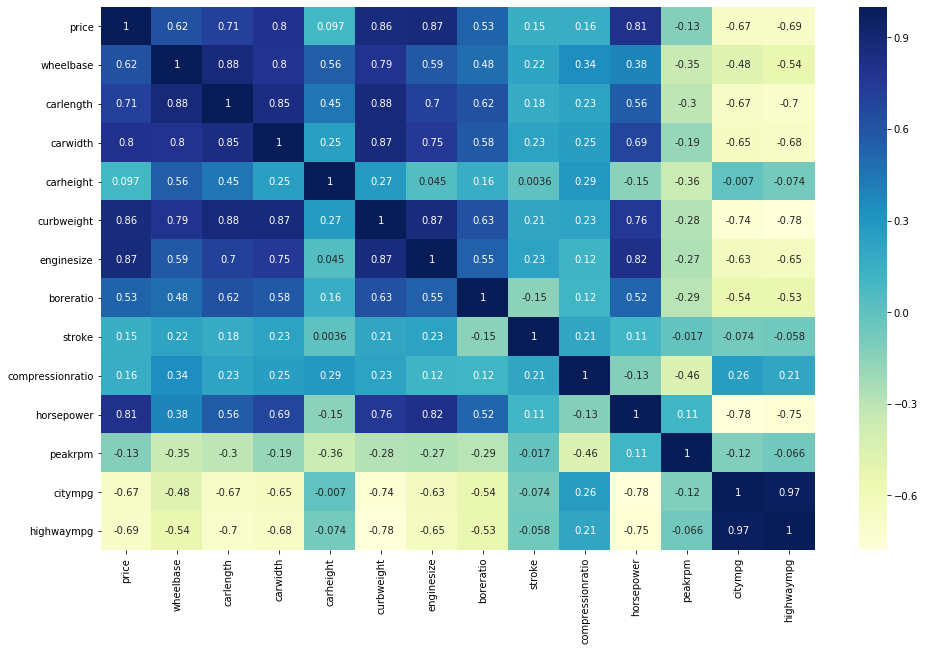

In [23]:
# Let's check the correlation coefficients to see which numeric variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(car_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

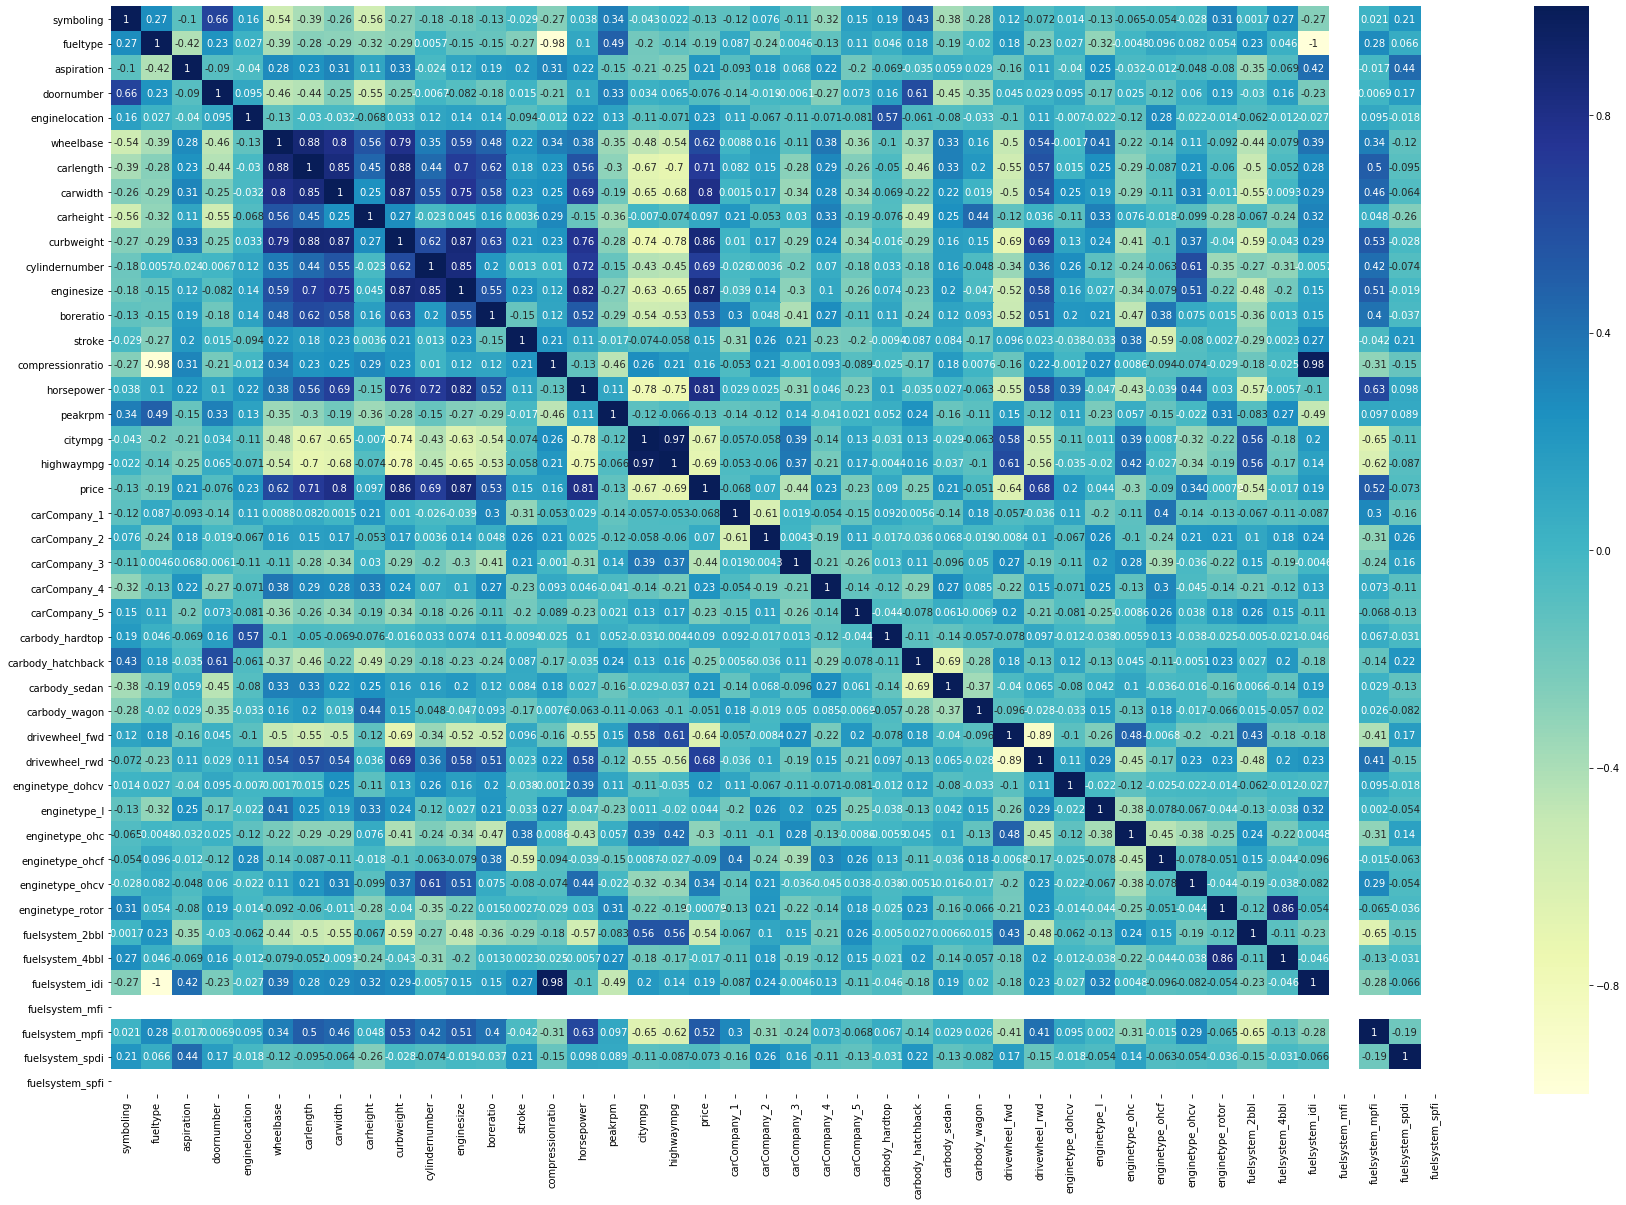

In [24]:
#And also adding the categorical variables
plt.figure(figsize = (30, 20))
sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [25]:
y_train = car_train.pop('price')
X_train = car_train

## Step 5: Building a linear model

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Fitting a regression line through the training data and Running RFE so that we have 10 output variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [27]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('symboling', False, 26),
 ('fueltype', False, 8),
 ('aspiration', False, 17),
 ('doornumber', False, 29),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', False, 13),
 ('carheight', False, 25),
 ('curbweight', True, 1),
 ('cylindernumber', False, 16),
 ('enginesize', True, 1),
 ('boreratio', False, 12),
 ('stroke', False, 4),
 ('compressionratio', False, 5),
 ('horsepower', True, 1),
 ('peakrpm', False, 9),
 ('citympg', False, 3),
 ('highwaympg', False, 11),
 ('carCompany_1', False, 23),
 ('carCompany_2', False, 18),
 ('carCompany_3', False, 10),
 ('carCompany_4', False, 22),
 ('carCompany_5', False, 19),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 2),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 27),
 ('drivewheel_rwd', False, 14),
 ('enginetype_dohcv', False, 15),
 ('enginetype_l', False, 24),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 21),
 ('enginetype_ohcv', Fals

In [28]:
#Let us see the columns that RFE selected 
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['enginelocation', 'wheelbase', 'carlength', 'curbweight', 'enginesize',
       'horsepower', 'carbody_hardtop', 'carbody_hatchback', 'carbody_wagon',
       'enginetype_rotor'],
      dtype='object')

In [29]:
# columns that RFE did not select
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carwidth',
       'carheight', 'cylindernumber', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'carCompany_1',
       'carCompany_2', 'carCompany_3', 'carCompany_4', 'carCompany_5',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

#### Building a model using statsmodel for detailed statistics, using the columns selected by RFE

In [30]:
X_train_rfe = X_train[selected_cols]

In [31]:
import statsmodels.api as sm

# Adding a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()


In [32]:
#and let us see the summary of our model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     81.57
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.60e-51
Time:                        22:07:06   Log-Likelihood:                 157.89
No. Observations:                 143   AIC:                            -293.8
Df Residuals:                     132   BIC:                            -261.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0831      0.02

We see that the column **carbody_hardtop** has a very high p-value. Let us drop this column and check our model's summary again.

In [33]:
X_train_rfe = X_train_rfe.drop(['carbody_hardtop'], axis = 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_2 = sm.OLS(y_train, X_train_rfe).fit()

#and let us see the summary of our model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     90.40
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.88e-52
Time:                        22:07:06   Log-Likelihood:                 157.27
No. Observations:                 143   AIC:                            -294.5
Df Residuals:                     133   BIC:                            -264.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0870      0.02

In [34]:
# Dropping variable 'carlength' due to its high p-value
X_train_rfe = X_train_rfe.drop(['carlength'], axis = 1)

# Build a third fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     99.48
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.49e-52
Time:                        22:07:06   Log-Likelihood:                 155.45
No. Observations:                 143   AIC:                            -292.9
Df Residuals:                     134   BIC:                            -266.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1202      0.02

In [35]:
# Dropping variable 'wheelbase' due to its high p-value
X_train_rfe = X_train_rfe.drop(['wheelbase'], axis = 1)

# Build a fourth fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.10e-53
Time:                        22:07:06   Log-Likelihood:                 154.26
No. Observations:                 143   AIC:                            -292.5
Df Residuals:                     135   BIC:                            -268.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1089      0.01

#### Now that we have all the variable p-vaues less than 0.05, let us see if there are high VIF values of these variables

### Checking VIF

In [36]:
X_train_rfe = X_train_rfe.drop('const', axis = 1)

In [37]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,26.29
1,curbweight,22.07
3,horsepower,11.16
5,carbody_wagon,1.44
6,enginetype_rotor,1.42
4,carbody_hatchback,1.39
0,enginelocation,1.13


As we can see from the summary and the VIF table, some variables are still insignificant. 
One of these variables is, `enginesize` as it has a very high VIF. Let's go ahead and drop this variable.

In [38]:
# Dropping variable 'enginesize' due to its high VIF value
X_train_rfe = X_train_rfe.drop(['enginesize'], axis = 1)

# Build a fifth fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_5 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.63e-51
Time:                        22:07:06   Log-Likelihood:                 146.89
No. Observations:                 143   AIC:                            -279.8
Df Residuals:                     136   BIC:                            -259.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1067      0.02

As we see , dropping the variable `enginesize` has increased the p-value of `enginetype_rotor`. Let us also drop this variable.

In [39]:
# Dropping variable 'enginetype_rotor' due to its high p-value
X_train_rfe = X_train_rfe.drop(['enginetype_rotor'], axis = 1)

# Build a sixth fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_6 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.25e-52
Time:                        22:07:06   Log-Likelihood:                 146.49
No. Observations:                 143   AIC:                            -281.0
Df Residuals:                     137   BIC:                            -263.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1070      0.02

**Now that we have all p-values less than 0.05, let us check for VIF of these variables.**

In [40]:
X_train_rfe_m6 = X_train_rfe
X_train_rfe = X_train_rfe.drop('const', axis = 1)


In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,8.60
2,horsepower,8.47
3,carbody_hatchback,1.31
4,carbody_wagon,1.29
0,enginelocation,1.12


We have high predictor VIF values for `curbweight`. Let us drop this variable.

In [42]:
# Dropping variable 'curbweight' due to its high VIF-value
X_train_rfe = X_train_rfe.drop(['curbweight'], axis = 1)

# Build a seventh fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_7 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     82.78
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.07e-35
Time:                        22:07:06   Log-Likelihood:                 104.43
No. Observations:                 143   AIC:                            -198.9
Df Residuals:                     138   BIC:                            -184.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0294      0.02

Dropping `curbweight` has increased p-value for `enginelocation`. Let us drop this for our new model.
Also Note that dropping `curbweight` has reduced the R-squared: 0.706 and Adj. R-squared: 0.697 values significantly. We will keep this model(sixth model) for further comparison.

In [43]:
# Dropping variable 'enginelocation' due to its high p-value
X_train_rfe = X_train_rfe.drop(['enginelocation'], axis = 1)

# Build a eighth fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_8 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.23e-36
Time:                        22:07:06   Log-Likelihood:                 104.15
No. Observations:                 143   AIC:                            -200.3
Df Residuals:                     139   BIC:                            -188.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0282      0.02

In [44]:
# Dropping variable 'carbody_wagon' due to its high p-value
X_train_rfe = X_train_rfe.drop(['carbody_wagon'], axis = 1)

# Build a ninth fitted model
X_train_rfe = sm.add_constant(X_train_rfe)

lr_9 = sm.OLS(y_train, X_train_rfe).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     163.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.42e-37
Time:                        22:07:06   Log-Likelihood:                 103.07
No. Observations:                 143   AIC:                            -200.1
Df Residuals:                     140   BIC:                            -191.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0177      0.01

**All p-values are less than 0.05, let us check for VIF.**

In [45]:
X_train_vif = X_train_rfe.drop('const', axis = 1)

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,1.26
1,carbody_hatchback,1.26


Since, we have dropped variables like `enginelocation`,`carbody_wagon` to arrive at our ninth model and we also saw these variables do not have much significance, let us start with dropping these variables from the model 6 we had, to arrive at another model 10.


In [47]:
X_train_rfe_m10 = X_train_rfe_m6.drop(['enginelocation'], axis=1)
X_train_rfe_m10.columns

Index(['const', 'curbweight', 'horsepower', 'carbody_hatchback',
       'carbody_wagon'],
      dtype='object')

In [48]:
# Build a tenth fitted model
X_train_rfe_m10 = sm.add_constant(X_train_rfe_m10)

lr_10 = sm.OLS(y_train, X_train_rfe_m10).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.75e-50
Time:                        22:07:06   Log-Likelihood:                 139.87
No. Observations:                 143   AIC:                            -269.7
Df Residuals:                     138   BIC:                            -254.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0990      0.02

In [49]:
X_train_vif = X_train_rfe_m10.drop('const', axis = 1)

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.08
1,horsepower,7.62
2,carbody_hatchback,1.29
3,carbody_wagon,1.29


In [51]:
X_train_rfe_m11 = X_train_rfe_m10.drop('carbody_hatchback', axis = 1)

# Build a eleventh fitted model
X_train_rfe_m11 = sm.add_constant(X_train_rfe_m11)

lr_11 = sm.OLS(y_train, X_train_rfe_m11).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.86e-50
Time:                        22:07:06   Log-Likelihood:                 136.21
No. Observations:                 143   AIC:                            -264.4
Df Residuals:                     139   BIC:                            -252.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1304      0.017     -7.534

In [52]:
X_train_vif = X_train_rfe_m11.drop('const', axis = 1)

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.08
1,horsepower,7.37
2,carbody_wagon,1.27


In [54]:
X_train_rfe_m12 = X_train_rfe_m11.drop('curbweight', axis = 1)

# Build a twelfth fitted model
X_train_rfe_m12 = sm.add_constant(X_train_rfe_m12)

lr_12 = sm.OLS(y_train, X_train_rfe_m12).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.23e-32
Time:                        22:07:06   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -178.0
Df Residuals:                     140   BIC:                            -169.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0195      0.019     -1.024

So now we have 4 models to choose from **Model 6, 9, 10, 11 each with an Adjusted R-square of 0.831, 0.696, 0.816, 0.807 respectively.**

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [55]:
y_train_price_m6 = lr_6.predict(X_train_rfe_m6)
y_train_price_m9 = lr_9.predict(X_train_rfe)
y_train_price_m10 = lr_10.predict(X_train_rfe_m10)
y_train_price_m11 = lr_11.predict(X_train_rfe_m11)

Text(0.5, 0, 'Errors')

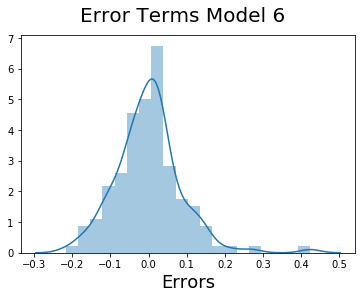

In [56]:
# Plotting histogram of the error terms for model 6.
fig = plt.figure()
sns.distplot((y_train - y_train_price_m6), bins = 20)
fig.suptitle('Error Terms Model 6', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

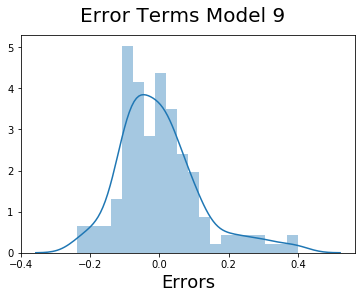

In [57]:
# Plotting histogram of the error terms for model 9.
fig = plt.figure()
sns.distplot((y_train - y_train_price_m9), bins = 20)
fig.suptitle('Error Terms Model 9', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

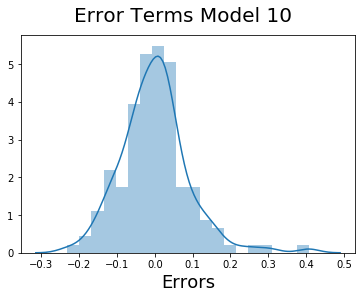

In [58]:
# Plotting histogram of the error terms for model 10.
fig = plt.figure()
sns.distplot((y_train - y_train_price_m10), bins = 20)
fig.suptitle('Error Terms Model 10', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

Text(0.5, 0, 'Errors')

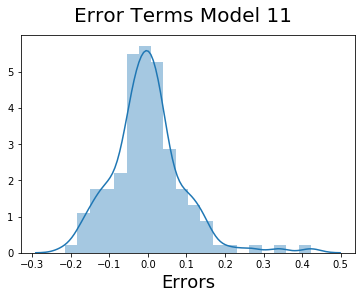

In [59]:
# Plotting histogram of the error terms for model 11.
fig = plt.figure()
sns.distplot((y_train - y_train_price_m11), bins = 20)
fig.suptitle('Error Terms Model 11', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 

#### We see that the error terms are more normally distributed for models 6 , 10 and 11 and also have narrower spread. Let us make predictions using all the models and select the one which has better r2-score.

## Step 7: Making Predictions Using the Models
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the models.

#### Applying the scaling on the test sets

In [60]:
car_test[num_vars] = scaler.transform(car_test[num_vars])
car_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.919355,0.887097,0.177419,0.435484,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,1.358620,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [61]:
y_test = car_test.pop('price')
X_test = car_test

In [62]:
# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)
X_test_m10 = sm.add_constant(X_test)
X_test_m11 = sm.add_constant(X_test)

In [63]:
# Creating X_test_m6 dataframe by keeping variables that we have selected for our model 6
X_test_m6 = X_test_m6[X_train_rfe_m6.columns]

In [64]:
# Creating X_test_m9 dataframe by keeping variables that we have selected for our model 10
X_test_m10 = X_test_m10[X_train_rfe_m10.columns]

In [65]:
# Creating X_test_m9 dataframe by keeping variables that we have selected for our model 11
X_test_m11 = X_test_m10[X_train_rfe_m11.columns]

In [66]:
# Making predictions using the sixth, ninth, tenth and eleventh models
y_pred_m6 = lr_6.predict(X_test_m6)
y_pred_m10 = lr_10.predict(X_test_m10)
y_pred_m11 = lr_11.predict(X_test_m11)

## Step 8: Model Evaluation
Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

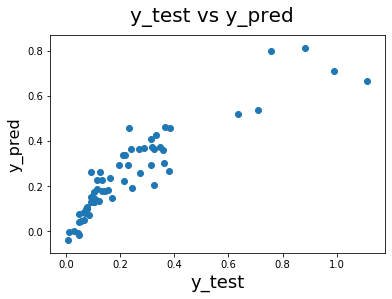

In [67]:
# Plotting y_test and y_pred to understand the spread for model 6

fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                
plt.ylabel('y_pred', fontsize = 16) 

Text(0, 0.5, 'y_pred')

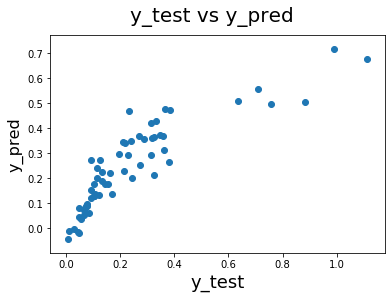

In [68]:
# Plotting y_test and y_pred to understand the spread for model 10

fig = plt.figure()
plt.scatter(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

Text(0, 0.5, 'y_pred')

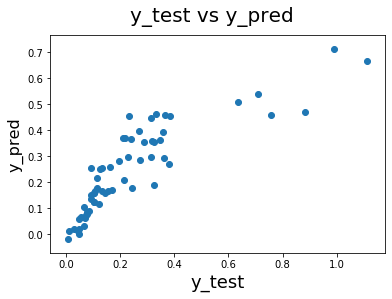

In [69]:
# Plotting y_test and y_pred to understand the spread for model 11

fig = plt.figure()
plt.scatter(y_test, y_pred_m11)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [70]:
#R-square of the selected model 6
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m6)

0.8076189655959648

In [71]:
r2_score(y_test, y_pred_m10)

0.7441180495816211

In [72]:
r2_score(y_test, y_pred_m11)

0.7218401493232709

**Model 6, 10, 11 each with an Adjusted R-square of 0.831, 0.816, 0.807 respectively.**

 We choose a model based on following-
- model with a high adjusted R2.
- model has equally distributed residuals around zero.
- the errors of this model are within a small bandwidth.

## Step 9: Model Selection and Conclusion

**We finally choose Model 6 because of its high adjusted R Square value and small error bandwidth which is normally distributed.**


In [75]:
print("Features chosen by our final model 6")
print(X_train_rfe_m6.columns)

Features chosen by our final model 6
Index(['const', 'enginelocation', 'curbweight', 'horsepower',
       'carbody_hatchback', 'carbody_wagon'],
      dtype='object')


In [76]:
print("R-squared score on the test set for final model 6 ")
r2_score(y_test, y_pred_m6)

R-squared score on the test set for final model 6 


0.8076189655959648